In [3]:
#importing 
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram



In [9]:
#loading dataset from librosa 
scale_file = "0_03_6.wav"
debussy_file = '0_04_7.wav'
redhot_file = '0_07_7.wav'
duke_file = '2_07_18.wav'

In [7]:
import IPython.display as ipd

scale_file = '0_03_6.wav'
ipd.Audio(scale_file)


In [11]:
ipd.Audio(debussy_file)

In [13]:
ipd.Audio(redhot_file)

In [15]:
#extracting fourier transformer
scale, sr = librosa.load(scale_file)
debussy, sr_debussy = librosa.load(debussy_file)
redhot, sr_redhot = librosa.load(redhot_file)
duke, sr_duke = librosa.load(duke_file)


In [17]:
FRAME_SIZE = 2048
HOP_SIZE = 512


In [21]:
D = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
D.shape


(1025, 26)

In [23]:
type(D[0][0])

numpy.complex64

In [28]:
import matplotlib.pyplot as plt
import librosa.display

def plot_spectrogram(Y, sr, hoplength, y_axis='linear', title='Spectrogram'):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hoplength, 
                             x_axis='time', 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.tight_layout()
    plt.show()


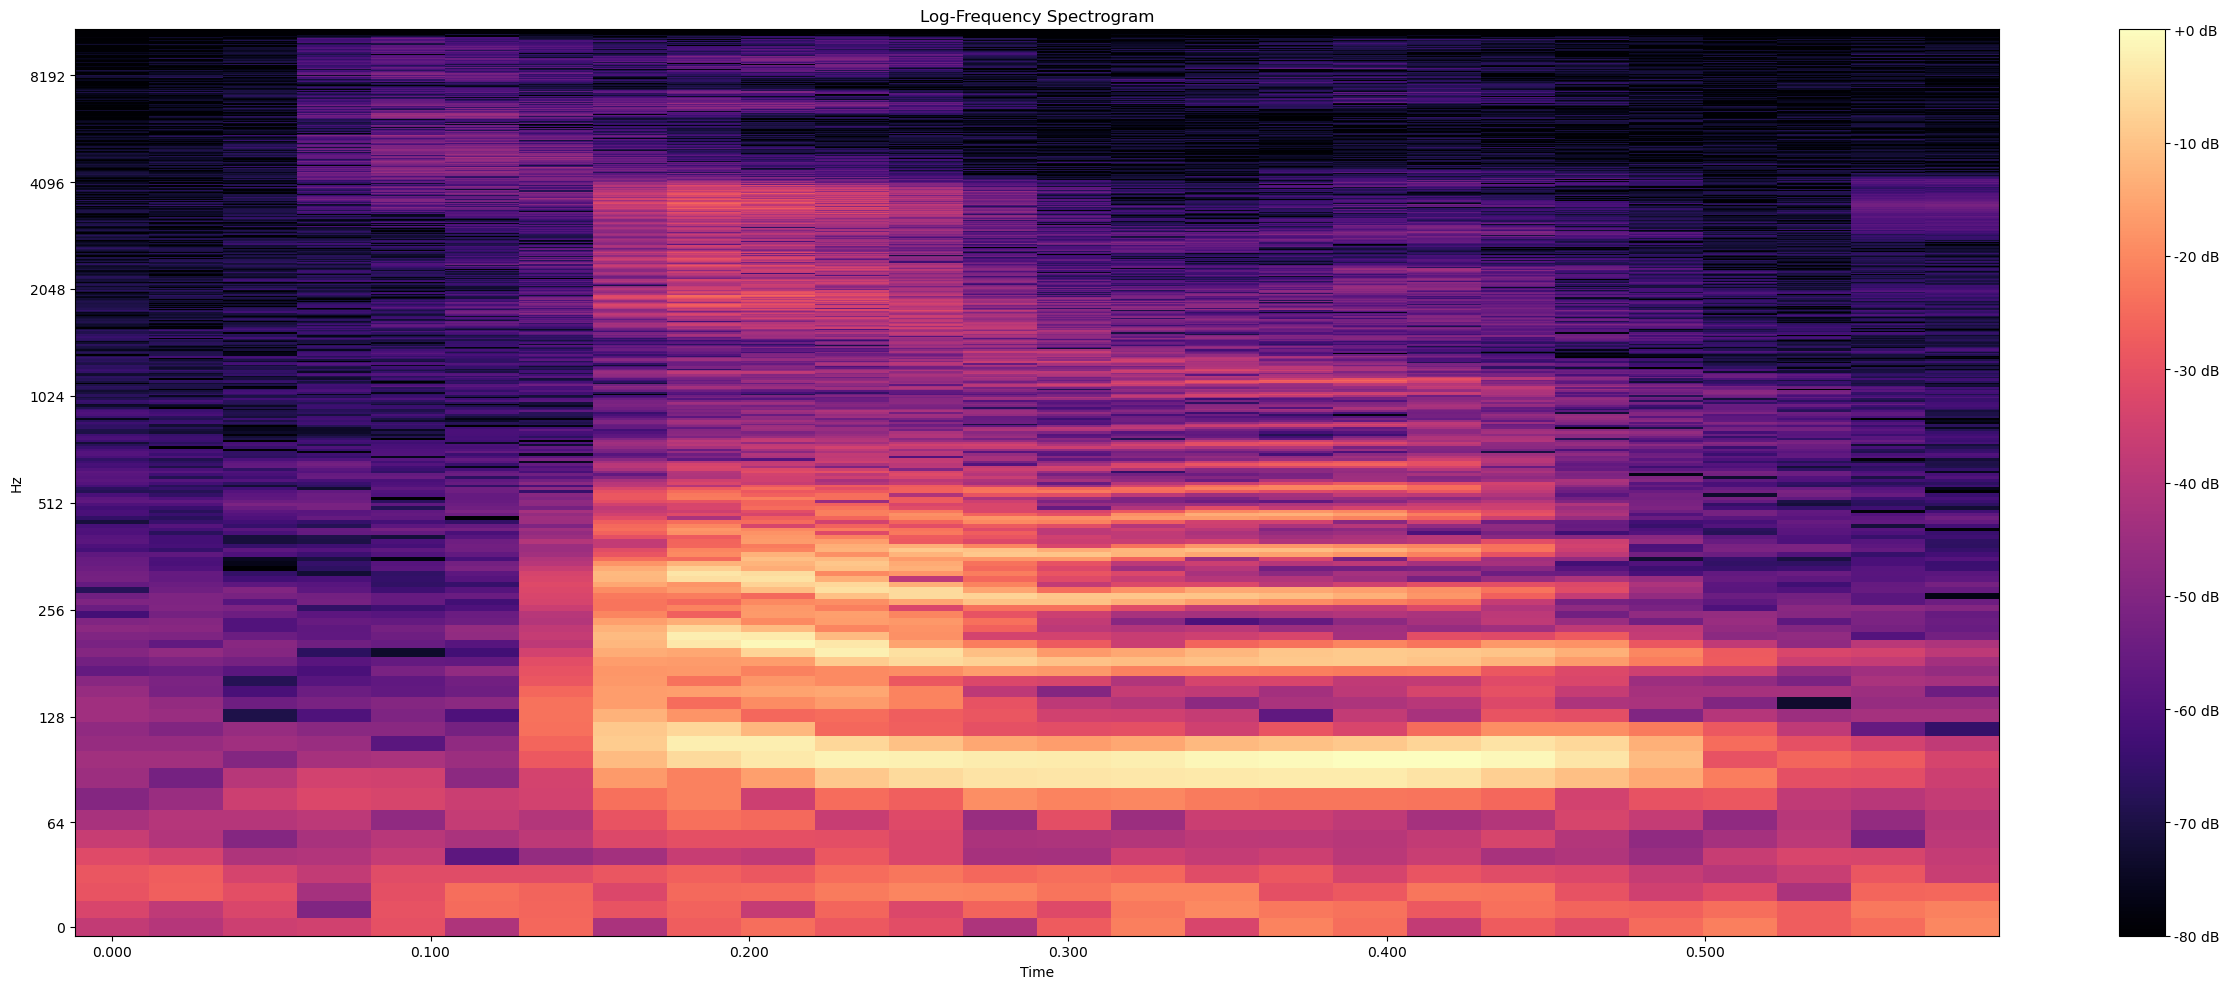

In [30]:
D = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

plot_spectrogram(S_db, sr=sr, hoplength=HOP_SIZE, y_axis='log', title='Log-Frequency Spectrogram')


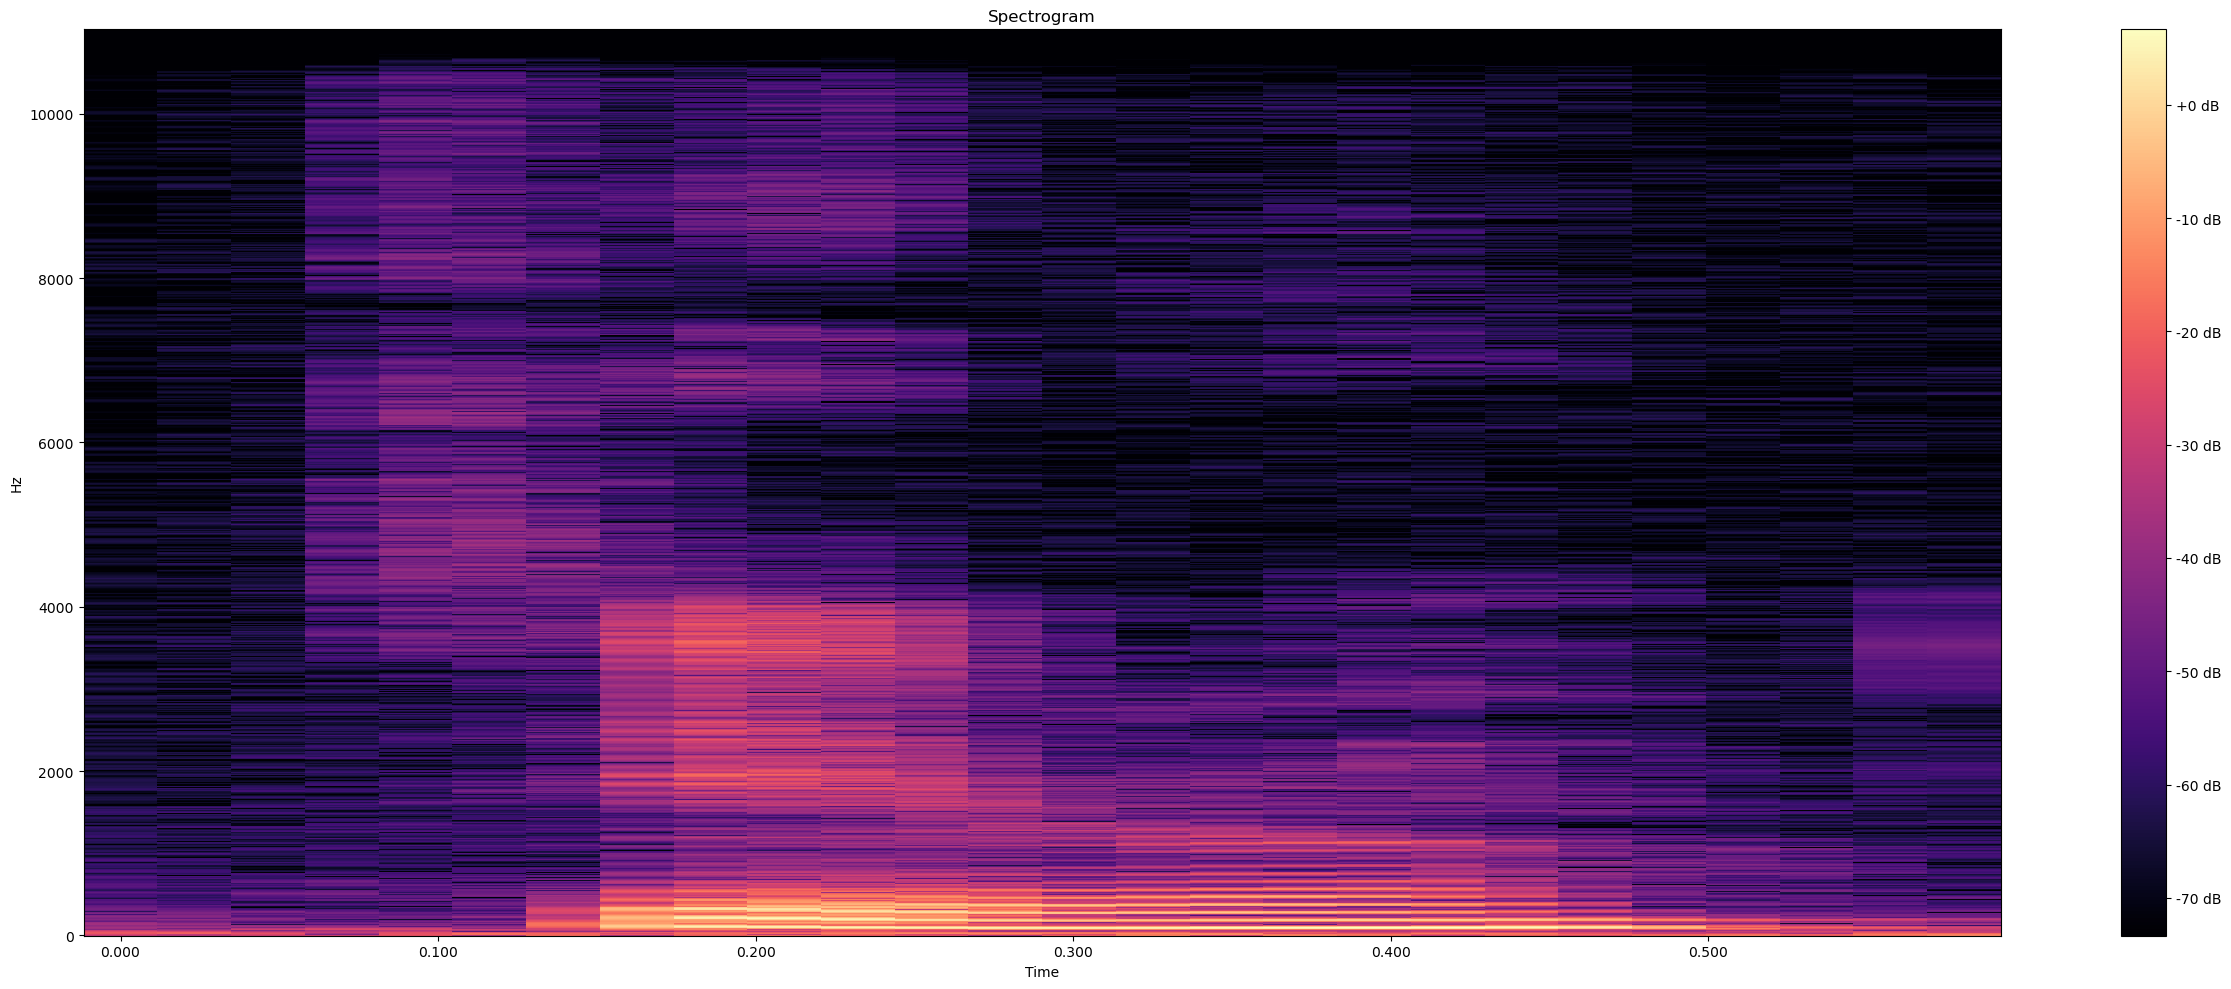

In [34]:
D = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(D)**2  # Power spectrogram
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)
